# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.linear_model  import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Dataset

In [3]:
# Train Dataset 
df_X_train = pd.read_csv( '../dataset/regressao/X_training.csv' )
df_y_train = pd.read_csv( '../dataset/regressao/y_training.csv' )

# Validation Dataset 
df_X_val = pd.read_csv( '../dataset/regressao/X_validation.csv' )
df_y_val = pd.read_csv( '../dataset/regressao/y_val.csv' )

# Validation Dataset 
df_X_test = pd.read_csv( '../dataset/regressao/X_test.csv' )
df_y_test = pd.read_csv( '../dataset/regressao/y_test.csv' )

# 2.0 - Polynomial Regression -  ElasticNet

Parametros:
* degree
* alpha
* l1_ratio
* max_iter

## 2.1 - Performance for Train Dataset

In [4]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform( df_X_train )

# Training
poly_elastic_net = ElasticNet( random_state=77 )
poly_elastic_net.fit( X_poly_train, df_y_train )

# Predict
y_pred_train = poly_elastic_net.predict( X_poly_train )

# Performance metrics
r2_train = mt.r2_score( df_y_train, y_pred_train )
mse_train = mt.mean_squared_error( df_y_train, y_pred_train )
rmse_train = mt.mean_squared_error( df_y_train, y_pred_train, squared=False )
mae_train = mt.mean_absolute_error( df_y_train, y_pred_train )
mape_train = mt.mean_absolute_percentage_error( df_y_train, y_pred_train )


print( f'Train R2: {r2_train:.7}' )
print( f'Train MSE: {mse_train:.7}' )
print( f'Train RMSE: {rmse_train:.7}' )
print( f'Train MAE: {mae_train:.7}' )
print( f'Train MAPE: {mape_train:.7}' )

Train R2: 0.01283276
Train MSE: 471.8783
Train RMSE: 21.72276
Train MAE: 17.24424
Train MAPE: 8.678786


## 2.2 - Performance for Validation

In [5]:
# Define polynomial model
poly = PolynomialFeatures()
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val   = poly.fit_transform( df_X_val ) 

# Training
poly_elastic_net = ElasticNet( random_state=77 )
poly_elastic_net.fit( X_poly_train, df_y_train )

# Predict
y_pred_val = poly_elastic_net.predict( X_poly_val )

# Performance metrics
r2_val = mt.r2_score( df_y_val, y_pred_val )
mse_val = mt.mean_squared_error( df_y_val, y_pred_val )
rmse_val = mt.mean_squared_error( df_y_val, y_pred_val, squared=False )
mae_val = mt.mean_absolute_error( df_y_val, y_pred_val )
mape_val = mt.mean_absolute_percentage_error( df_y_val, y_pred_val )


print( f'Val R2: {r2_val:.7}' )
print( f'Val MSE: {mse_val:.7}' )
print( f'Val RMSE: {rmse_val:.7}' )
print( f'Val MAE: {mae_val:.7}' )
print( f'Val MAPE: {mape_val:.7}' )

Val R2: 0.01278178
Val MSE: 471.4082
Val RMSE: 21.71194
Val MAE: 17.19997
Val MAPE: 8.675108


## 2.3 - Hyperparameter Fine Tuning

## Degree

In [6]:
degree = np.arange( 1, 6 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [7]:
for d in degree:
    # Define polynomial model
    poly = PolynomialFeatures( degree=d )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val   = poly.fit_transform( df_X_val ) 

    # Training
    poly_elastic_net = ElasticNet( random_state=77 )
    poly_elastic_net.fit( X_poly_train, df_y_train )

    # Predict
    y_pred = poly_elastic_net.predict( X_poly_val )

    # Performance metrics
    r2 = mt.r2_score( df_y_val, y_pred )
    mse = mt.mean_squared_error( df_y_val, y_pred )
    rmse = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae = mt.mean_absolute_error( df_y_val, y_pred )
    mape = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list.append( r2 )
    mse_list.append( mse )
    rmse_list.append( rmse )
    mae_list.append( mae )
    mape_list.append( mape )

    print( f'Degree: {d}, RMSE {rmse}' )

Degree: 1, RMSE 21.76317109916543
Degree: 2, RMSE 21.711936016392396
Degree: 3, RMSE 21.69248795804233
Degree: 4, RMSE 22.497638169043952
Degree: 5, RMSE 57.02479906157281


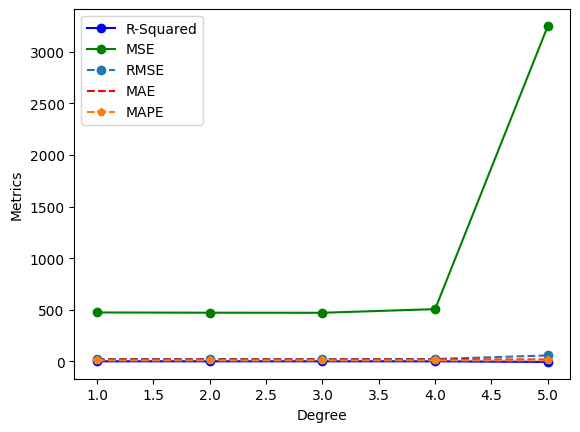

In [8]:
plt.plot( degree, r2_list, 'bo-', label='R-Squared')
plt.plot( degree, mse_list, 'go-', label='MSE')
plt.plot( degree, rmse_list, 'o--', label='RMSE')
plt.plot( degree, mae_list, 'r--', label='MAE')
plt.plot( degree, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Degree' )
plt.ylabel( 'Metrics' )
plt.legend();

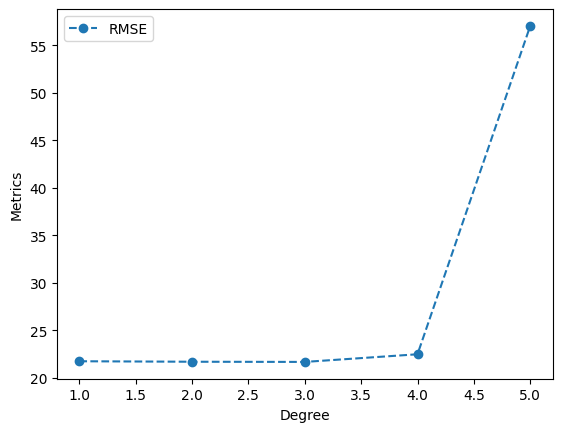

In [9]:
plt.plot( degree, rmse_list, 'o--', label='RMSE')
plt.xlabel( 'Degree' )
plt.ylabel( 'Metrics' )
plt.legend();

In [10]:
best_degree = degree[ np.argmin( mse_list ) ]
best_degree

3

## Alpha

In [11]:
alpha = np.arange( 0.0, 2.1, 0.1 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [12]:
for a in alpha:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val   = poly.fit_transform( df_X_val ) 

    # Training
    poly_elastic_net = ElasticNet( random_state=77, alpha=a )
    poly_elastic_net.fit( X_poly_train, df_y_train )

    # Predict
    y_pred = poly_elastic_net.predict( X_poly_val )

    # Performance metrics
    r2 = mt.r2_score( df_y_val, y_pred )
    mse = mt.mean_squared_error( df_y_val, y_pred )
    rmse = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae = mt.mean_absolute_error( df_y_val, y_pred )
    mape = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list.append( r2 )
    mse_list.append( mse )
    rmse_list.append( rmse )
    mae_list.append( mae )
    mape_list.append( mape )

    print( f'Alpha: {a}, Alpha {rmse}' )

Alpha: 0.0, Alpha 21.73316819750565
Alpha: 0.1, Alpha 21.31983179178051
Alpha: 0.2, Alpha 21.386016067766846
Alpha: 0.30000000000000004, Alpha 21.45581151495478
Alpha: 0.4, Alpha 21.53267531721072
Alpha: 0.5, Alpha 21.59967162958528
Alpha: 0.6000000000000001, Alpha 21.64621616731611
Alpha: 0.7000000000000001, Alpha 21.675608393000378
Alpha: 0.8, Alpha 21.687876144601017
Alpha: 0.9, Alpha 21.690853843202362
Alpha: 1.0, Alpha 21.69248795804233
Alpha: 1.1, Alpha 21.693761520193608
Alpha: 1.2000000000000002, Alpha 21.695504045533976
Alpha: 1.3, Alpha 21.69884776472749
Alpha: 1.4000000000000001, Alpha 21.704004372185416
Alpha: 1.5, Alpha 21.710579275425346
Alpha: 1.6, Alpha 21.718336173026795
Alpha: 1.7000000000000002, Alpha 21.726828783859872
Alpha: 1.8, Alpha 21.735365448799097
Alpha: 1.9000000000000001, Alpha 21.743431229280713
Alpha: 2.0, Alpha 21.75183076043075


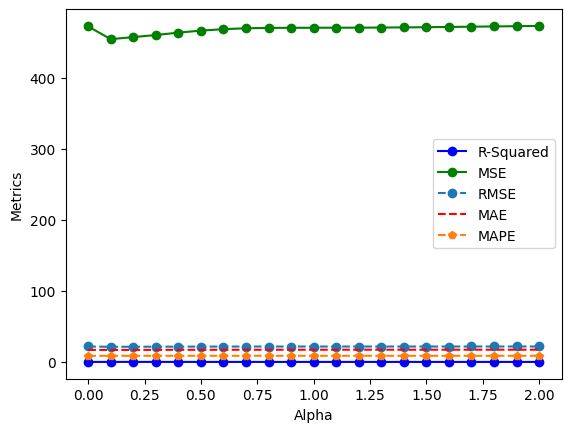

In [13]:
plt.plot( alpha, r2_list, 'bo-', label='R-Squared')
plt.plot( alpha, mse_list, 'go-', label='MSE')
plt.plot( alpha, rmse_list, 'o--', label='RMSE')
plt.plot( alpha, mae_list, 'r--', label='MAE')
plt.plot( alpha, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

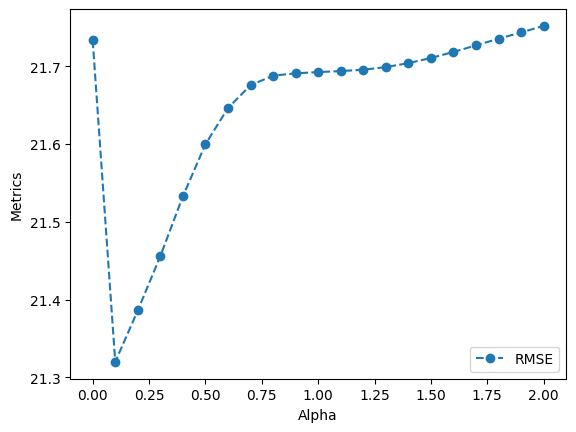

In [14]:
plt.plot( alpha, rmse_list, 'o--', label='RMSE')
plt.xlabel( 'Alpha' )
plt.ylabel( 'Metrics' )
plt.legend();

In [15]:
best_alpha = alpha[ np.argmin( rmse_list ) ]
best_alpha

0.1

L1 Ratio

In [18]:
l1_ratio = np.arange( 0.0, 1.1, 0.1 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [19]:
for l in l1_ratio:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val = poly.fit_transform( df_X_val )

    # Training
    poly_elastic_net = ElasticNet( random_state=77, alpha=best_alpha, l1_ratio=l )
    poly_elastic_net.fit( X_poly_train, df_y_train )

    # Predict
    y_pred = poly_elastic_net.predict( X_poly_val )

    # Performance metrics
    r2 = mt.r2_score( df_y_val, y_pred )
    mse = mt.mean_squared_error( df_y_val, y_pred )
    rmse = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae = mt.mean_absolute_error( df_y_val, y_pred )
    mape = mt.mean_absolute_error( df_y_val, y_pred )

    r2_list.append( r2 )
    mse_list.append( mse )
    rmse_list.append( rmse )
    mae_list.append( mae )
    mape_list.append( mape )

    print( f'L1 Ratio: {l}, RMSE: {rmse}')

L1 Ratio: 0.0, RMSE: 21.442349780281127
L1 Ratio: 0.1, RMSE: 21.41235309292301
L1 Ratio: 0.2, RMSE: 21.37549167641593
L1 Ratio: 0.30000000000000004, RMSE: 21.352851321147693
L1 Ratio: 0.4, RMSE: 21.336721145899705
L1 Ratio: 0.5, RMSE: 21.31983179178051
L1 Ratio: 0.6000000000000001, RMSE: 21.297467102916784
L1 Ratio: 0.7000000000000001, RMSE: 21.289684366701035
L1 Ratio: 0.8, RMSE: 21.27182482038262
L1 Ratio: 0.9, RMSE: 21.24274907742258
L1 Ratio: 1.0, RMSE: 21.19888299618871


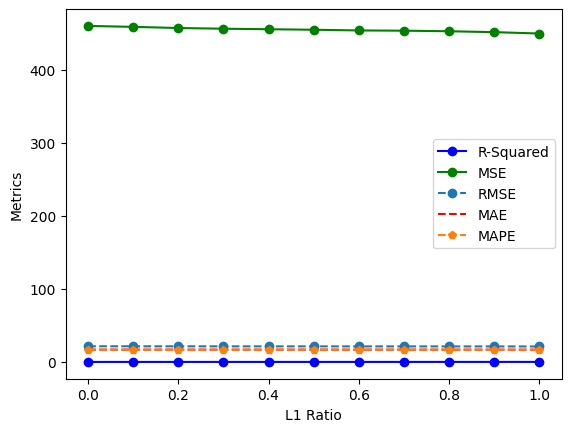

In [20]:
plt.plot( l1_ratio, r2_list, 'bo-', label='R-Squared')
plt.plot( l1_ratio, mse_list, 'go-', label='MSE')
plt.plot( l1_ratio, rmse_list, 'o--', label='RMSE')
plt.plot( l1_ratio, mae_list, 'r--', label='MAE')
plt.plot( l1_ratio, mape_list, 'p--', label='MAPE')
plt.xlabel( 'L1 Ratio' )
plt.ylabel( 'Metrics' )
plt.legend();

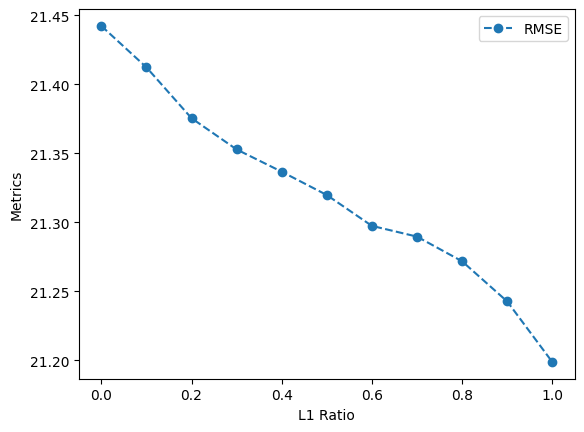

In [21]:
plt.plot( l1_ratio, rmse_list, 'o--', label='RMSE')
plt.xlabel( 'L1 Ratio' )
plt.ylabel( 'Metrics' )
plt.legend();

In [22]:
best_l1_ratio = l1_ratio[ np.argmin( rmse_list) ]
best_l1_ratio

1.0

## Max iter

In [23]:
max_iter = np.arange( 100, 2100, 100 )

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [24]:
for m in max_iter:
    # Define polynomial model
    poly = PolynomialFeatures( degree=best_degree )
    X_poly_train = poly.fit_transform( df_X_train )
    X_poly_val   = poly.fit_transform( df_X_val ) 

    # Training
    poly_elastic_net = ElasticNet( random_state=77, alpha=best_alpha, max_iter=m )
    poly_elastic_net.fit( X_poly_train, df_y_train )

    # Predict
    y_pred = poly_elastic_net.predict( X_poly_val )

    # Performance metrics
    r2 = mt.r2_score( df_y_val, y_pred )
    mse = mt.mean_squared_error( df_y_val, y_pred )
    rmse = mt.mean_squared_error( df_y_val, y_pred, squared=False )
    mae = mt.mean_absolute_error( df_y_val, y_pred )
    mape = mt.mean_absolute_percentage_error( df_y_val, y_pred )

    r2_list.append( r2 )
    mse_list.append( mse )
    rmse_list.append( rmse )
    mae_list.append( mae )
    mape_list.append( mape )

    print( f'Max Iter: {m}, Rmse {rmse}' )

Max Iter: 100, Rmse 21.291461700816544
Max Iter: 200, Rmse 21.321166827052604
Max Iter: 300, Rmse 21.33042541509507
Max Iter: 400, Rmse 21.328998771824306
Max Iter: 500, Rmse 21.324525816658216
Max Iter: 600, Rmse 21.321222346138757
Max Iter: 700, Rmse 21.31956172216903
Max Iter: 800, Rmse 21.31939550076488
Max Iter: 900, Rmse 21.3196927227336
Max Iter: 1000, Rmse 21.31983179178051
Max Iter: 1100, Rmse 21.31983179178051
Max Iter: 1200, Rmse 21.31983179178051
Max Iter: 1300, Rmse 21.31983179178051
Max Iter: 1400, Rmse 21.31983179178051
Max Iter: 1500, Rmse 21.31983179178051
Max Iter: 1600, Rmse 21.31983179178051
Max Iter: 1700, Rmse 21.31983179178051
Max Iter: 1800, Rmse 21.31983179178051
Max Iter: 1900, Rmse 21.31983179178051
Max Iter: 2000, Rmse 21.31983179178051


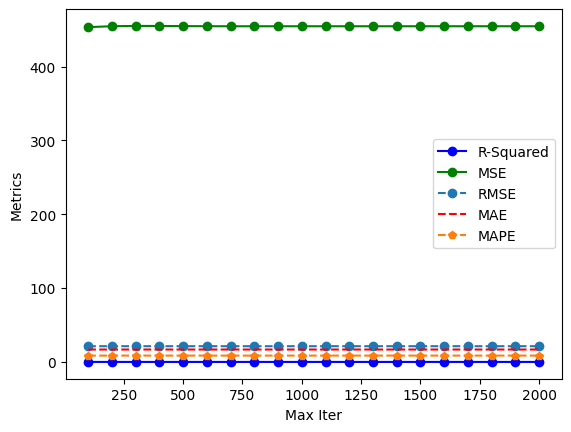

In [25]:
plt.plot( max_iter, r2_list, 'bo-', label='R-Squared')
plt.plot( max_iter, mse_list, 'go-', label='MSE')
plt.plot( max_iter, rmse_list, 'o--', label='RMSE')
plt.plot( max_iter, mae_list, 'r--', label='MAE')
plt.plot( max_iter, mape_list, 'p--', label='MAPE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

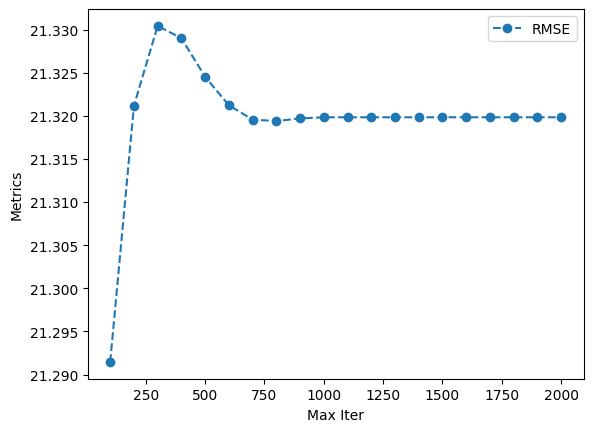

In [26]:
plt.plot( max_iter, rmse_list, 'o--', label='RMSE')
plt.xlabel( 'Max Iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [28]:
best_iter = max_iter[ np.argmin( rmse) ]
best_iter

100

## 2.4 - Performance for Test Dataset

In [29]:
# Define polynomial model
poly = PolynomialFeatures( degree=best_degree )
X_poly_train = poly.fit_transform( df_X_train )
X_poly_val = poly.fit_transform( df_X_val )
X_poly_test = poly.fit_transform( df_X_test )

# Train 
poly_elastic_net = ElasticNet( random_state=77, alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=best_iter )
poly_elastic_net.fit( np.concatenate(( X_poly_train, X_poly_val )), np.concatenate(( df_y_train, df_y_val )) )

# Predict
y_pred_test = poly_elastic_net.predict( X_poly_test )

# Performance metrics
r2_test = mt.r2_score( df_y_test, y_pred_test )
mse_test = mt.mean_squared_error( df_y_test, y_pred_test )
rmse_test = mt.mean_squared_error( df_y_test, y_pred_test,squared=False )
mae_test = mt.mean_absolute_error( df_y_test, y_pred_test )
mape_test = mt.mean_absolute_percentage_error( df_y_test, y_pred_test )

print( f'Test R2: {r2_test:.7}' )
print( f'Test MSE: {mse_test:.7}' )
print( f'Test RMSE: {rmse_test:.7}' )
print( f'Test MAE: {mae_test:.7}' )
print( f'Test MAPE: {mape_test:.7}' )

Test R2: 0.07660808
Test MSE: 449.6004
Test RMSE: 21.20378
Test MAE: 16.84439
Test MAPE: 8.441403
